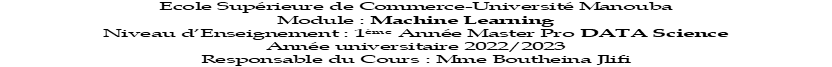

 # TP4-Partie1: Régression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
data_salary = pd.read_csv("salary_data.csv")
print ("Dataset ouvert le", datetime.now())

Dataset ouvert le 2022-11-13 23:19:39.247928


In [3]:
data_salary.shape 

(30, 2)

In [5]:
data_salary.head(30)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [6]:
data_salary.describe (include= 'number')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
X = data_salary[['YearsExperience']]
Y = data_salary[['Salary']]


Text(0, 0.5, 'Salaire')

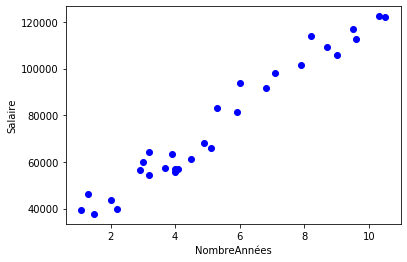

In [6]:
plt.scatter(X, Y, color='blue')
plt.xlabel("NombreAnnées")
plt.ylabel("Salaire")

In [7]:
# Split
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print ("Dataset divisé en test et train")

Dataset divisé en test et train


In [25]:
#Conversion sous forme de tableau
tab_X_train = X_train.to_numpy ()
tab_Y_train = Y_train.to_numpy ()
tab_X_test = X_test.to_numpy ()
tab_Y_test = Y_test.to_numpy ()
print (tab_X_train)

[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
OurModel=lin_reg.fit(tab_X_train, tab_Y_train)
print(OurModel.coef_)
print (OurModel.intercept_)

[[9312.57512673]]
[26780.09915063]


Text(0, 0.5, 'Salaire')

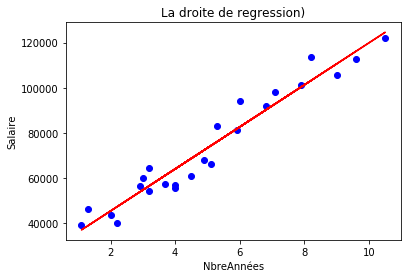

In [12]:
plt.scatter(tab_X_train, tab_Y_train, color='blue')
plt.plot(tab_X_train, OurModel.coef_[0][0]*X_train+OurModel.intercept_[0], 'red')
plt.title('La droite de regression)')
plt.xlabel("NbreAnnées")
plt.ylabel("Salaire")

In [10]:
test_Y_hat = OurModel.predict(tab_X_test)
print ("Y calculé")
print(test_Y_hat)
# Le calculé ou prédit
print ("Y observé")
print (tab_Y_test) # L'existant


Y calculé
[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]
Y observé
[[ 37731]
 [122391]
 [ 57081]
 [ 63218]
 [116969]
 [109431]]


Text(0, 0.5, 'Salaire')

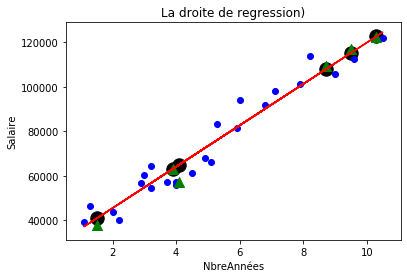

In [13]:
plt.scatter(tab_X_test, test_Y_hat, color='black', s= 180) #prédit droite de regréssion
plt.scatter(tab_X_train, tab_Y_train, color='blue') # observé ou existant du dataset (train set)
plt.scatter(tab_X_test, tab_Y_test, color='green', marker='^', s=100) # observé ou existant (test set)
plt.plot(X_train, OurModel.coef_[0][0]*X_train+OurModel.intercept_[0], 'red')
plt.title('La droite de regression)')
plt.xlabel("NbreAnnées")
plt.ylabel("Salaire")

In [14]:
from sklearn.metrics import r2_score
print("R2-score: coefficient de détermination", r2_score(test_Y_hat , tab_Y_test) )

R2-score: coefficient de détermination 0.986482673117654


In [30]:
from sklearn.metrics import mean_squared_error
m1=mean_squared_error(tab_Y_test, test_Y_hat, squared= False)
print("RMSE est:",m1)

RMSE est: 3580.979237321345


In [52]:
OurModel.predict([[3.7]])


array([[61236.62711953]])

### SVM pour la regréssion linéaire

In [53]:
from sklearn import svm

In [54]:

regrsvm = svm.SVC(kernel='linear') # une grde valeur de gamma donne un overfitting 
OurModelSVM= regrsvm.fit(tab_X_train, tab_Y_train)
OurModelSVM

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
test_Y_hatsvm = OurModelSVM.predict(tab_X_test)
print(test_Y_hatsvm) # Le calculé ou prédit
print (tab_Y_test) # L'existant

[ 46205 121872  56957  56957 112635 105582]
[[ 37731]
 [122391]
 [ 57081]
 [ 63218]
 [116969]
 [109431]]


In [56]:
print("R2-score:", r2_score(test_Y_hatsvm , tab_Y_test) )
m=mean_squared_error(tab_Y_test, test_Y_hat, squared= False)
print("RMSE avec fonction est:",m)

R2-score: 0.9741668009319369
RMSE avec fonction est: 3580.979237321345


In [57]:
OurModelSVM.predict([[3.7]])

array([57189], dtype=int64)

## Regression polynomiale

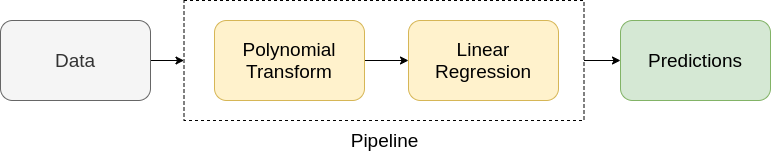

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(tab_X_train) # transformation de tab_X_train en polynome 
print ("Le polynome est")
print (X_poly)
print ("Le X train est")
print (tab_X_train)
Our_pol_reg = LinearRegression()
Our_pol_reg.fit(X_poly, tab_Y_train)
print(Our_pol_reg.coef_)
print(Our_pol_reg.intercept_)

Le polynome est
[[1.00000000e+00 9.60000000e+00 9.21600000e+01 8.84736000e+02
  8.49346560e+03]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02]
 [1.00000000e+00 5.30000000e+00 2.80900000e+01 1.48877000e+02
  7.89048100e+02]
 [1.00000000e+00 7.90000000e+00 6.24100000e+01 4.93039000e+02
  3.89500810e+03]
 [1.00000000e+00 2.90000000e+00 8.41000000e+00 2.43890000e+01
  7.07281000e+01]
 [1.00000000e+00 5.10000000e+00 2.60100000e+01 1.32651000e+02
  6.76520100e+02]
 [1.00000000e+00 3.20000000e+00 1.02400000e+01 3.27680000e+01
  1.04857600e+02]
 [1.00000000e+00 4.50000000e+00 2.02500000e+01 9.11250000e+01
  4.10062500e+02]
 [1.00000000e+00 8.20000000e+00 6.72400000e+01 5.51368000e+02
  4.52121760e+03]
 [1.00000000e+00 6.80000000e+00 4.62400000e+01 3.14432000e+02
  2.13813760e+03]
 [1.00000000e+00 1.30000000e+00 1.69000000e+00 2.19700000e+00
  2.85610000e+00]
 [1.00000000e+00 1.05000000e+01 1.10250000e+02 1.15762500e+03
  1.21550625e+04]
 [1.00000000e+00 3.00000

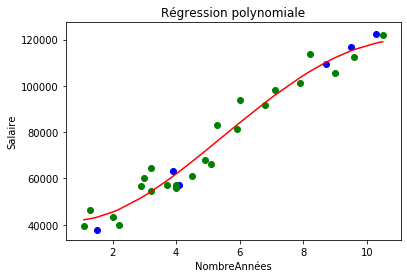

In [63]:
Xtab= X.to_numpy()
Ytab= Y.to_numpy()
plt.scatter(tab_X_test, tab_Y_test, color='blue')
plt.scatter(tab_X_train, tab_Y_train, color='green')
plt.plot(Xtab, Our_pol_reg.predict(poly_reg.fit_transform(Xtab)), color='red')
plt.title('Régression polynomiale')
plt.xlabel('NombreAnnées')
plt.ylabel('Salaire')
plt.show()
   


In [65]:
Y2pred_poly=Our_pol_reg.predict(poly_reg.fit_transform(tab_X_test))
print ("Le RMSE avec polynomial est")
mean_squared_error(tab_Y_test,Y2pred_poly, squared=False)

Le RMSE avec polynomial est


3844.563901844218

In [27]:

print("R2-score:", r2_score(tab_Y_test , Y2pred_poly) )

R2-score: 0.9863638087307347


In [28]:
pol_reg2.predict(poly_reg.fit_transform([[3.7]]))

array([[58904.33151369]])